In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.impute as im

In [526]:
df = pd.read_csv('./model_data.csv')

new_df = pd.DataFrame({
    'Sentiment_Polarity': df['Sentiment_Polarity'],
    'Sentiment_Subjectivity': df['Sentiment_Subjectivity'],
    'Rating': df['Rating']
})

imputer = im.SimpleImputer(missing_values=pd.NA, strategy='mean')
imputer = imputer.fit(new_df)
imputed_df = imputer.transform(new_df.values)

spolar = imputed_df[:, 0]
subj = imputed_df[:, 1]
rat = imputed_df[:, 2]

df['Sentiment_Polarity'] = spolar
df['Sentiment_Subjectivity'] = subj
df['Rating'] = rat

df = df.dropna()

df = df.sample(frac=1).reset_index(drop=True)
df

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,Calorie Counter - MyNetDiary,This wonderful works great I wish I could pay ...,Positive,0.900000,0.875000,4.500000
1,Down Dog: Great Yoga Anywhere,This really useful. I using minutes everyday w...,Positive,0.151905,0.351667,4.900000
2,8 Ball Pool,I previous profile however updates I lost 1.5 ...,Negative,-0.572917,0.741667,4.500000
3,10 Best Foods for You,Doesn't work... Zero,Neutral,0.000000,0.000000,4.000000
4,Curso de Ingles Gratis,Great,Positive,0.800000,0.750000,3.998583
...,...,...,...,...,...,...
37422,Google Photos,Google photos useful app. It various things su...,Positive,0.410000,0.560000,4.500000
37423,Fraction Calculator Plus Free,"This awesome, helped lot things,it really work...",Positive,0.566667,0.600000,4.500000
37424,Backgrounds HD (Wallpapers),Rubbish,Neutral,0.000000,0.000000,4.600000
37425,Candy Crush Soda Saga,The game progressively challenging fun. The po...,Negative,-0.042500,0.547500,4.400000


11
345


(array([2486.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   31.,
          65.,    0.,    0.,   63.,  120.,   39.,   64.,  240.,  300.,
         216.,  563.,  766., 1341., 3453., 2799., 3703., 4914., 4948.,
        4547., 4204., 2212.,  313.,   40.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 , 1.078, 1.176, 1.274, 1.372, 1.47 , 1.568, 1.666,
        1.764, 1.862, 1.96 , 2.058, 2.156, 2.254, 2.352, 2.45 , 2.548,
        2.646, 2.744, 2.842, 2.94 , 3.038, 3.136, 3.234, 3.332, 3.43 ,
        3.528, 3.626, 3.724, 3.822, 3.92 , 4.018, 4.116, 4.214, 4.312,
        4.41 , 4.508, 4.606, 4.704, 4.802, 4.9  ]),
 <BarContainer object of 50 artists>)

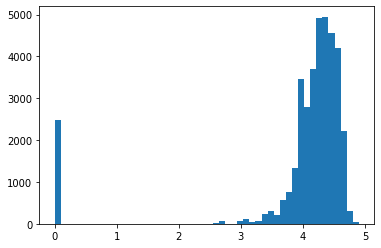

In [527]:
ratings = np.array(list(df['Rating']))

# enc_ratings = []
# encoder = np.array([0, 1, 2, 3, 4, 5])
# for i in range(len(ratings)):
#     rating = ratings[i]

#     enc_ratings.append((encoder == rating) * 1)

applen = []
app_names = list(df['App'])
for i in range(len(app_names)):
    length = len(app_names[i].split(' '))

    applen.append(length)

max_applen = np.max(applen)
applen = np.array(applen)/max_applen

wordlen = []
revs = list(df['Translated_Review'])
for i in range(len(revs)):
    length = len(revs[i].split(' '))

    wordlen.append(length)

max_wordlen = np.max(wordlen)
wordlen = np.array(wordlen)/max_wordlen

print(max_applen)
print(max_wordlen)

sentiment = ((np.array(list(df['Sentiment'])) == "Positive") * 1) + ((np.array(list(df['Sentiment'])) == "Negative") * 1 * -1)
spolarity = list(df['Sentiment_Polarity'])
subjectivity = list(df['Sentiment_Subjectivity'])
plt.hist(ratings, bins=50)

In [528]:
df.value_counts(subset=["Rating"])

Rating  
4.400000    4948
4.300000    4914
4.500000    4547
4.600000    4204
4.200000    3703
4.100000    2799
0.000000    2486
4.700000    2212
4.000000    1955
3.998583    1498
3.900000    1341
3.800000     766
3.700000     563
4.800000     313
3.500000     300
3.400000     240
3.600000     216
3.100000     120
2.700000      65
3.300000      64
3.000000      63
4.900000      40
3.200000      39
2.600000      31
dtype: int64

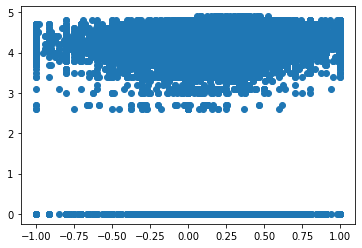

In [529]:
plt.scatter(spolarity, ratings)

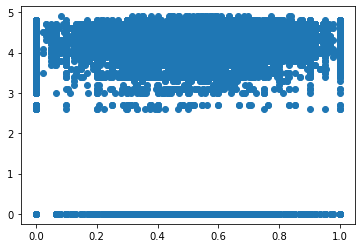

In [530]:
plt.scatter(subjectivity, ratings)

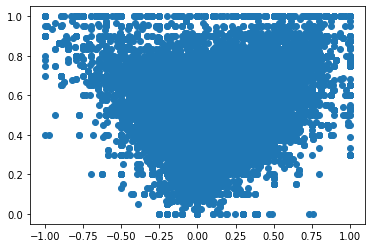

In [531]:
plt.scatter(spolarity, subjectivity)

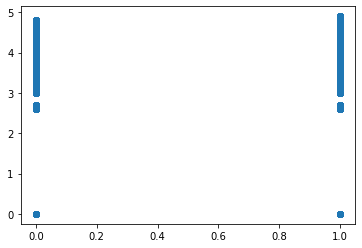

In [532]:
sent = (np.array(list(df['Sentiment'])) == "Positive") * 1
plt.scatter(sent, ratings)

In [533]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class NN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.inp = nn.Linear(input_size, 1)
        # self.h1 = nn.Linear(5, 5)
        self.out = nn.Linear(1, 1)
    
    def forward(self, x):
        x = torch.sigmoid(self.inp(x))
        # x = F.sigmoid(self.h1(x))
        x = self.out(x)

        return x

class NN2(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.inp = nn.LSTM(input_size, 32, 2)
        self.l1 = nn.Linear(32, 16)
        self.l2 = nn.Linear(16, 1)

    def forward(self, x):
        print(x)
        x = self.inp(x)
        x = self.l1(x)
        return self.l2(x)

In [534]:
print(torch.nn.LSTM)

<class 'torch.nn.modules.rnn.LSTM'>


In [550]:
epochs = 100

model = NN(input_size=5)

cutoff = 100

data = zip(zip(applen/11, wordlen/345, sentiment, spolarity, subjectivity), ratings)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001 , momentum=0.01)

losses = []

min_loss = float('inf')
search_for_min = False

for _ in range(100):
    count = 0
    for training_ex, y in data:
        t_X = torch.Tensor(training_ex)
        t_y = torch.Tensor([y])

        preds = model(t_X)

        loss = criterion(preds, t_y)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            search_for_min = True

        if search_for_min:
            if loss.item() < min_loss:
                min_loss = loss.item()
                torch.save(model.state_dict(), f'./model')
                print(f'[ Data pt {count} Loss {loss.item()} ]')

                search_for_min = False

        # if count == 17500:
        #     break
        # if count == cutoff:
        #     break

    print(min_loss)

[ Data pt 100 Loss 11.511628150939941 ]
[ Data pt 201 Loss 10.855570793151855 ]
[ Data pt 300 Loss 5.670740604400635 ]
[ Data pt 400 Loss 5.201915264129639 ]
[ Data pt 501 Loss 2.550394058227539 ]
[ Data pt 601 Loss 1.0642791986465454 ]
[ Data pt 700 Loss 0.05121859535574913 ]
[ Data pt 895 Loss 0.0009781128028407693 ]
[ Data pt 992 Loss 0.0005567172192968428 ]
[ Data pt 1240 Loss 8.985683234641328e-05 ]
[ Data pt 1339 Loss 2.2723726942786016e-05 ]
[ Data pt 1647 Loss 6.963318810448982e-07 ]
[ Data pt 4555 Loss 4.0583836380392313e-07 ]
[ Data pt 6294 Loss 1.2636752444450394e-07 ]
[ Data pt 10186 Loss 1.2066999488524743e-07 ]
[ Data pt 10487 Loss 4.502567207964603e-08 ]
[ Data pt 11472 Loss 1.58470356836915e-08 ]
[ Data pt 12373 Loss 1.4917986845830455e-09 ]
[ Data pt 12936 Loss 1.2116743164369836e-09 ]
[ Data pt 13594 Loss 6.571099220309407e-11 ]
[ Data pt 26936 Loss 5.684341886080802e-14 ]
5.684341886080802e-14
5.684341886080802e-14
5.684341886080802e-14
5.684341886080802e-14
5.684341

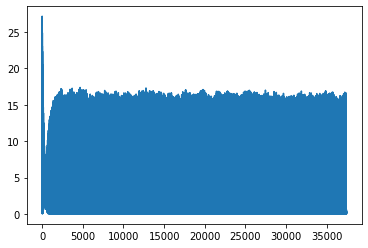

In [551]:
plt.plot([i for i in range(len(losses))], losses)

In [552]:
nmodel = NN(input_size=5)
nmodel.load_state_dict(torch.load('./model'))

total_loss = 0

max_loss = 0
for i in range(cutoff+1, len(ratings)):
    X = torch.Tensor([applen[i], wordlen[i], sentiment[i], spolarity[i], subjectivity[i]])
    pred = nmodel(X)

    curr_loss = ((pred) - (ratings[i])) ** 2 

    if curr_loss > max_loss:
        max_loss = curr_loss
    if curr_loss > 400:
        print(X, pred)

    total_loss += curr_loss

print(max_loss)
print(total_loss)
print(f"avg loss per pred {total_loss/(len(ratings) - cutoff+1)}")

tensor([16.4811], grad_fn=<PowBackward0>)
tensor([45726.9219], grad_fn=<AddBackward0>)
avg loss per pred tensor([1.2250], grad_fn=<DivBackward0>)


In [553]:
print(nmodel(torch.Tensor([4/11, 1/345, 1, 0.6, 1])))

print(nmodel(torch.Tensor([4/11, 12/345, 1, 0.55903, 0.61111])))

tensor([3.9593], grad_fn=<AddBackward0>)
tensor([3.9604], grad_fn=<AddBackward0>)
